# Konventionelles Machinelle Lernen

![AI vs ML vs DL](./_img/03_ai_ml_dl.png)

Kurzer Definitionsausflug

> **Künstliche Intelligenz (KI)** (engl. _Artifical Intelligence (AI)_)
- Beschreibt im direkten Sinne alle Computerprogramme die auf irgendwelcher Weise _intelligent_ handeln. Sie können, müssen aber nicht lernfähig sein.
- Beispiele:
    - Expertensysteme
        - feste Regeln für bestimmte Situationen
        - Beispiel (1): _intelligenter_ Rasensprenger; wenn gestern kein Regen (bspw. via Feuchtigkeitssensor) -> Rasen sprengen
        - Beispiel (2): Schachcomputer; komplexe und tiefe Berechnungen und Regelentscheidungen
    - Chatbots vor chatGPT usw.

> **Maschinelles Lernen (ML)** (engl. _Machine Learning_)
- Teilgebiet der künstlichen Intelligenz, bei dem die Entscheidungen anhand von Daten gelernt werden.
- Beispiele:
    - Lineare Regression: statistisches Analyseverfahren zur Schätzung und Vorhersage anhand einer oder mehrerer Variablen (erlaubt kontinuierliche Werte)
        - Beispiel (1): Schätzung von Immobilienpreisen anhand von `lage`, `größe`, `anzahl_zimmer`
    - Klassifizierung: Klassenzuordnung für Eingabeparameter
        - Beispiel (1): Entscheidung über die Blumenart anhand der Blütenlängen
        - Beispiel (2): Hund oder Katze anhand eines Bildes
        - Beispiel (3): Ziffernerkennung 

> **Deep Learning (DL)** später :-) 

## 3.1. Klassifizierung

Wir laden erneut den Schwertliniendatensatz.

In [1]:
# Importieren der Ladefunktion
from sklearn.datasets import load_iris  

Das folgende bitte einfach ignorieren :-) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def which_model_is_better(show_test_data=False):

    fig, ax = plt.subplots(ncols = 2, figsize=(16,9))

    # Generating synthetic data
    np.random.seed(42)
    x = np.linspace(0, 10, 30)
    y = x + np.random.normal(0, 0.5, x.shape[0])

    # Splitting data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Polynomial Regression Model
    degree = 8  # Very high degree for overfitting
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(x_train[:, np.newaxis], y_train)



    # Visualizing the model performance
    ax[0].scatter(x_train, y_train, color='blue', label='Trainingsdaten')
    ax[0].plot(np.linspace(0, 10, 100), polyreg.predict(np.linspace(0, 10, 100)[:, np.newaxis]), color='red', label=fr'$f(x)$')
    
    ax[0].legend()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('x')
    ax[0].grid()

    ax[1].scatter(x_train, y_train, color='blue', label='Validierungsdaten')
    ax[1].plot((0,10), (0, 10), color = 'red', label = '$f(x)$')
    ax[1].legend()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('x')
    ax[1].grid()

    if show_test_data:
        ax[0].scatter(x_test, y_test, color='green', label='Validierungsdaten')
        ax[1].scatter(x_test, y_test, color='green', label='Validierungsdaten')
        y_pred = polyreg.predict(x_test[:, np.newaxis])
        mae_overfitted = mean_absolute_error(y_test, y_pred)
        mae_gt = mean_absolute_error(y_test, x_test)
        ax[0].set_title(f"Durschnitlicher Absoluter Fehler: {mae_overfitted:.3f} (auf Validierungsdaten)")
        ax[1].set_title(f"Durschnitlicher Absoluter Fehler: {mae_gt:.3f} (auf Validierungsdaten)")
    else:
        y_pred = polyreg.predict(x_train[:, np.newaxis])
        mae_overfitted = mean_absolute_error(y_train, y_pred)
        mae_gt = mean_absolute_error(y_train, x_train)
        ax[0].set_title(f"Durschnitlicher Absoluter Fehler: {mae_overfitted:.3f}")
        ax[1].set_title(f"Durschnitlicher Absoluter Fehler: {mae_gt:.3f}")

In [3]:
# Laden des Datensatzes als pandas DataFrame
iris_dataset = load_iris(as_frame=True)
# Extrahieren des DataFrames 
# Erinnerung: im iris_dataset versteckt sich auch eine Beschreibung, etc.
df = iris_dataset["frame"]
# Anzeigen der ersten 10 Einträge
df.head(n = 10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Formulierung: Machine Learning Modell

Ein Machine Learning Modell ist nichts anderes als eine Funktion dessen Parameter wir versuchen zu finden, weshalb man auch hier die gewohnte Bezeichnung $X$ (Eingabe) und $y$ (Ausgabe) nutzt:
$$
f_{\theta}(X) = \hat{y},
$$

wobei $f$ das Machine Learning Modell, $\theta$ dessen Parameter sind und $\hat{y}$ die Vorhersage für $y$ ist.

Das Ziel ist es $\theta$ so zu finden, sodass der Fehler, heißt der Unterschied zwischen Vorhersage und Zielwert minimal ist, zum Beispiel der **Mean Absolute Error** (Durchschnittlicher Absoluter Fehler):

$$
MAE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n | y - \hat{y} |
$$

> Note: $X$ wird hierbei groß geschrieben, da es meist eine Matrix ist (mehrdimensional) und $y$ meist ein eindimensionaler Vektor ist.

In [4]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Train-Test Split 

Wir teilen unsere Daten in Training und Testdaten auf.

In [7]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 80% Training - 20% Test
    random_state=0 # Damit wir immer die gleiche 'zufällige' Aufteilung erhalten
)

In [16]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is:  (120, 4)
The shape of X_test is:  (30, 4)
The shape of y_train is:  (120,)
The shape of y_test is:  (30,)


In [17]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [18]:
y_train.head()

137    2
84     1
27     0
127    2
132    2
Name: target, dtype: int64

### Aber wieso Train-Test Split?

Würde es nicht mehr Sinn machen so viele Daten wie möglich ins Training zu stecken?

Welches der folgenden Modelle ist besser? 

Wollen wir perfekt die Trainingsdaten abbilden?

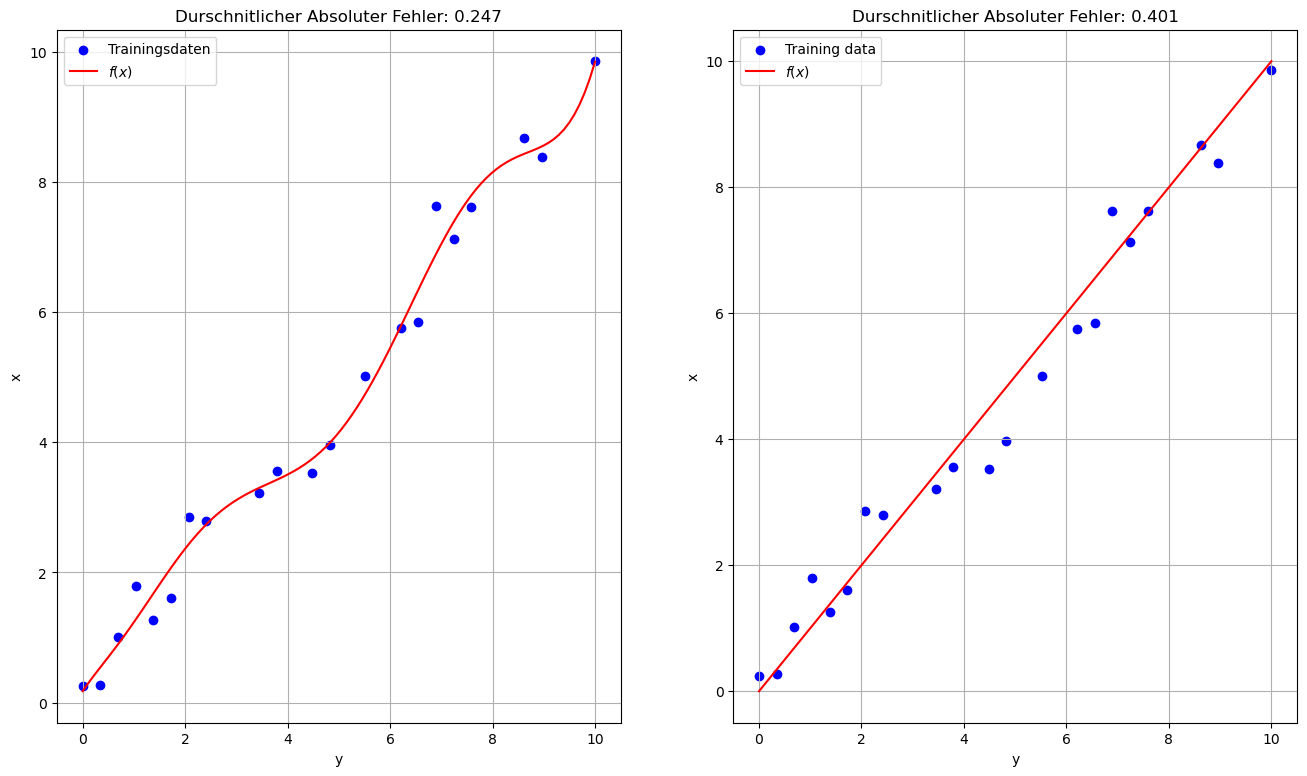

In [19]:
which_model_is_better()

Es ist gängige Praxis sich einige Daten aus dem Datensatz zum Validieren rauszunehmen. 
So können wir simulieren wie sich unser Modell auf bisher ungesehenen Daten schlagen würde.

Man versucht dann ein Modell zu finden, dass möglichst gut auf dem Validierungsdatensatz performed.

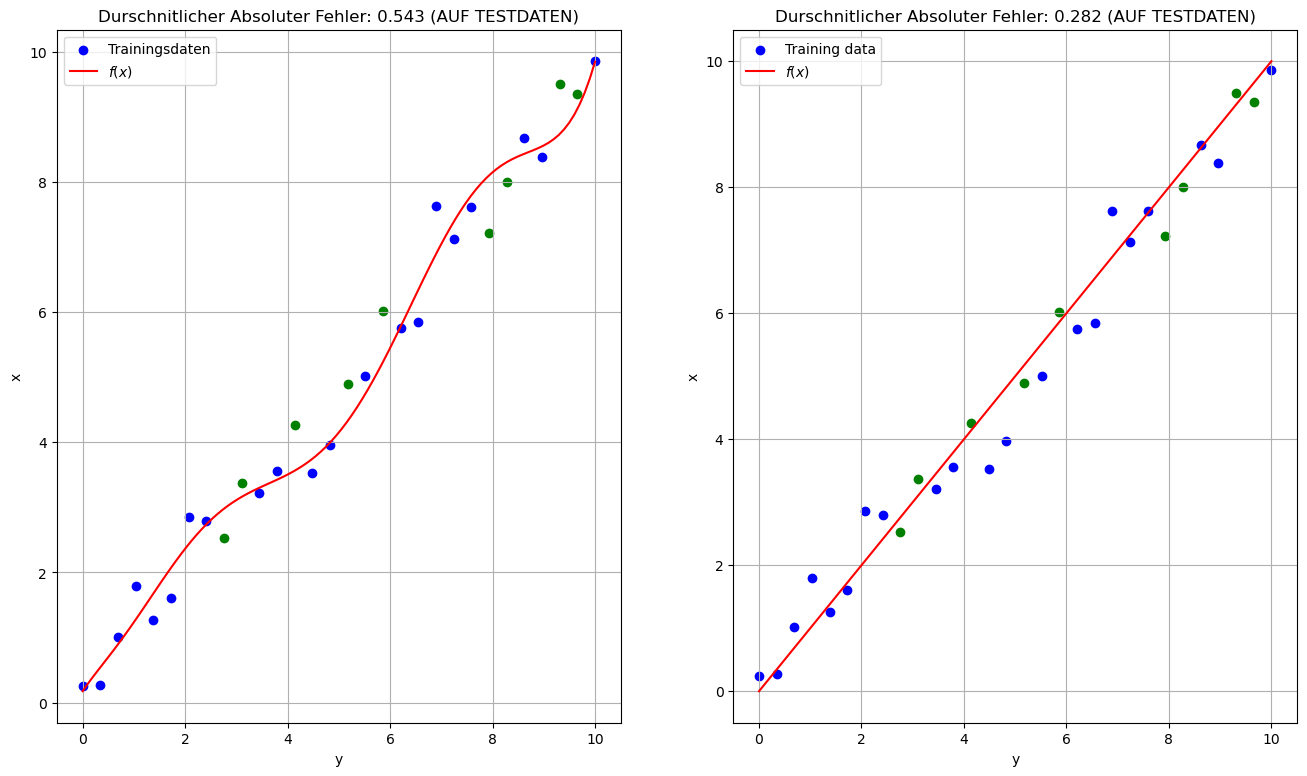

In [20]:
which_model_is_better(show_test_data=True)

Man versucht also ein Modell zu finden, dass komplex genug ist um die Beziehungen zwischen den Daten korrekt zu finden, aber nicht zu sensibel auf kleine Schwankungen zu sein.

![](_img/03_bias_variance_tradeoff.webp)

Randbemerkung:

Die Funktion heißt `train_test_split`. Üblicherweise hat man aber 3 Datensätze:
- Training (60-80% der Daten)
    - Wird wie der Name sagt zum Trainieren des Modells verwendet
- Validierung (10-20% der Daten)
    - Wird genutzt um das Modell zu validieren
    - Heißt es dient als Check ob das Modell gut auf ungesehenen Daten performt 
    - Während der Optimierungsphase genutzt
    - Achtung: Da wir das Modell für diese Daten optimieren ist der Datensatz nicht ganz unabhängig obwohl es nicht im Training vorkommt - weshalb man noch einen Testdatensatz nutzt
- Test (10-20% der Daten)
    - Dieser Datensatz wird während der Optimierung gar nicht angefasst! 
    - Dient wie die Validierungsdaten zur Modellvalidierung
    - Jedoch wird er erst genutzt, wenn man sich anhand der Trainings- und Validierungdaten sicher ist, dass das Modell gut ist

> Um es jetzt aber nicht unnötig komplex zu machen bleiben wir bei dem etwas unsauberen Train-Test Split

## Action

Unser gegebenes Problem ist ein Klassifizierungproblem
- Input: 4 Features/Variablen (Längen und Breiten der Blüten)
- Output: höchstwahrscheinliche Klasse 

Wir werden uns ein recht einfaches Modell anschauen, nämlich einen Entscheidungsbaum und eine Erweiterung namens "Random Forests".
Aber damit ihr ein Gefühl dafür bekommt wie riesig alleine die Landschaft der _klassischen_ ML Architekturen für Klassifizierungprobleme ist, hier eine kurze Auflistung der in `sklearn` enthaltenen:

1. **Lineare Modelle**
   - `LogisticRegression`: Logistische Regression
   - `RidgeClassifier`: Ridge-Klassifikator
   - `SGDClassifier`: Stochastischer Gradient Descent Klassifikator
   - `Perceptron`: Perzeptron

2. **Support Vector Machines**
   - `SVC`: Support Vector Klassifikator
   - `NuSVC`: Nu-Support Vector Klassifikator
   - `LinearSVC`: Linearer Support Vector Klassifikator

3. **Nächste Nachbarn**
   - `KNeighborsClassifier`: k-Nächste Nachbarn Klassifikator
   - `RadiusNeighborsClassifier`: Radius-Nachbarn Klassifikator
   - `NearestCentroid`: Nächster Zentroid Klassifikator

4. **Gauß'sche Prozesse**
   - `GaussianProcessClassifier`: Gaussian Prozess Klassifikator

5. **Naive Bayes**
   - `GaussianNB`: Gaussian Naive Bayes
   - `MultinomialNB`: Multinomial Naive Bayes
   - `BernoulliNB`: Bernoulli Naive Bayes
   - `ComplementNB`: Komplement Naive Bayes
   - `CategoricalNB`: Kategorialer Naive Bayes

6. **Entscheidungsbäume und Ensembles**
   - `DecisionTreeClassifier`: Entscheidungsbaum Klassifikator
   - `RandomForestClassifier`: Random Forest Klassifikator
   - `ExtraTreesClassifier`: Extra Bäume Klassifikator
   - `GradientBoostingClassifier`: Gradient Boosting Klassifikator
   - `HistGradientBoostingClassifier`: Histogrammbasiertes Gradient Boosting Klassifikator
   - `BaggingClassifier`: Bagging Klassifikator
   - `AdaBoostClassifier`: AdaBoost Klassifikator

7. **Diskriminanzanalyse**
   - `LinearDiscriminantAnalysis`: Lineare Diskriminanzanalyse
   - `QuadraticDiscriminantAnalysis`: Quadratische Diskriminanzanalyse

8. **Neuronale Netze**
   - `MLPClassifier`: Multi-layer Perceptron Klassifikator

9. **Andere Klassifikatoren**
   - `LabelPropagation`: Label Propagation
   - `LabelSpreading`: Label Spreading
   - `PassiveAggressiveClassifier`: Passiv-Aggressiver Klassifikator
   - `VotingClassifier`: Voting Klassifikator (Ensemble aus mehreren Modellen)
   - `StackingClassifier`: Stacking Klassifikator (Ensemble unter Verwendung eines Meta-Klassifikators)

### Entscheidungsbaum

Ein sehr einfaches und wahrscheinlich den meisten bekanntes Modell.

Wir haben eine baumartige Struktur mit Spaltungskriterien. 
In jeder Stufe wird für ein Datenpunkt eine Frage gestellt. Ziel beim Training ist es die Fragen so zu stellen, dass jede den Datensatz am besten aufteilt.

Wir werden gleich eine Visualisierung sehen, keine Angst!

### `sklearn` Nutzung

Das Training von Modellen mit `sklearn` ist fast schon absurd einfach.

Wir erstellen ein Objekt mit unserem Modell:
```python
model = SomeClassifier()
```

Und passen das Modell den Daten an
```python
model.fit(X_train, y_train)
```

In [21]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train) 

DecisionTreeClassifier()

Sklearn bietet zudem viele Metriken zum Quantifizieren der Modellperformance.

Beispielsweise können wir die Genauigkeitsmetrik nutzen. (Wie viele Punkte wurden korrekt klassifiziert)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(
    y_true = y_train, 
    y_pred = dec_tree.predict(X_train)
)

print(f"Training Accuracy: {accuracy_train}")

Training Accuracy: 1.0


In [26]:
accuracy_test = accuracy_score(
    y_true = y_test, 
    y_pred = dec_tree.predict(X_test)
)

print(f"Test Accuracy: {accuracy_test}")

Test Accuracy: 1.0


Tatsächlich splittet unser Entscheidungsbaum sowohl Training als auch Testdaten perfekt!

Wir können den Baum visualisieren und nachvollziehen wieso es so gut funktioniert.

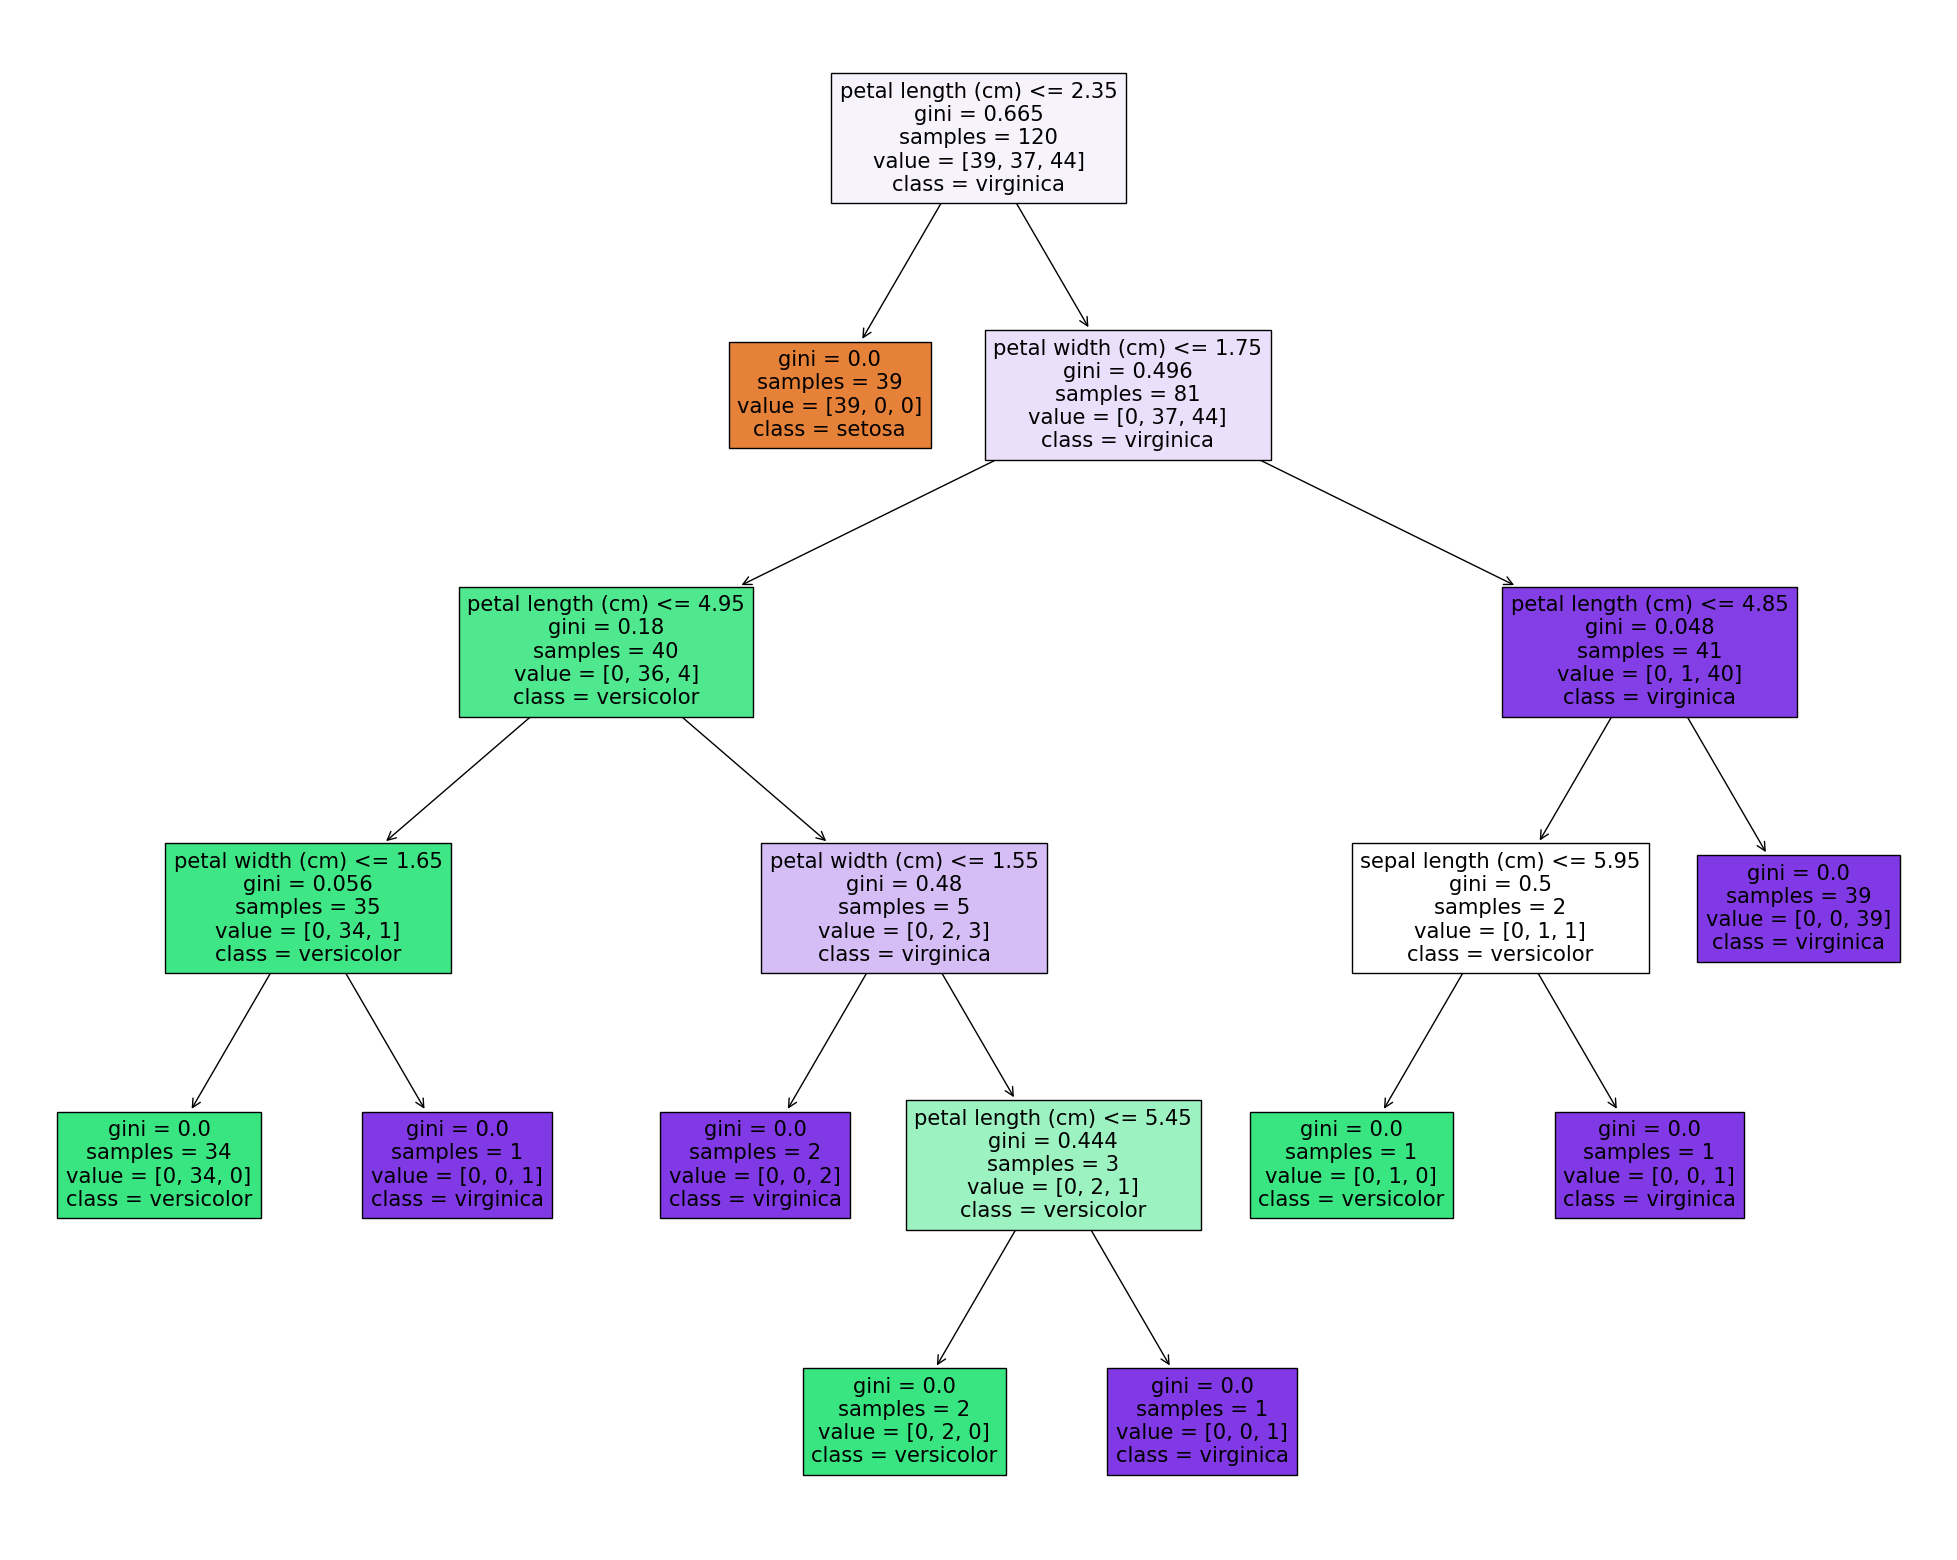

In [24]:
from matplotlib import pyplot as plt 
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(dec_tree, 
          feature_names=X_train.columns,
          class_names = iris_dataset["target_names"],
          filled=True);

Zum Vergleich nochmal der Plot von vorhin.

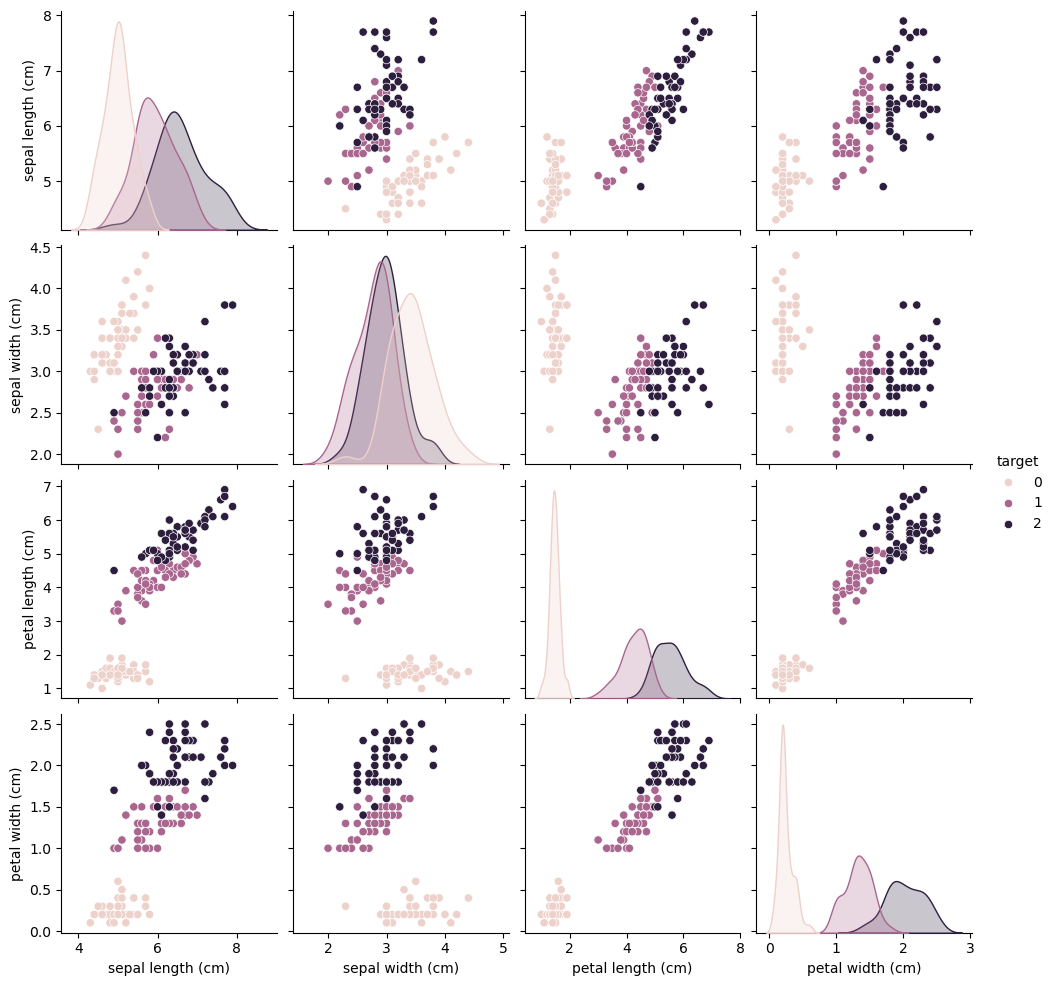

In [31]:
import seaborn as sns 

sns.pairplot(df, hue="target")

### Random Forest

Obwohl unser Modell bereits perfekt ist können wir uns noch den Random Forest anschauen.

Idee: Ein Entscheidungsbaum reicht meist nicht aus um komplexe Datensätze abzubilden. Wir können aber einfach mehrere auf Sub-Datensätzen trainieren und das Durchschnittsvotum nehmen.

In [1]:
from sklearn.ensemble import RandomForestClassifier

### Aufgabe

Trainiere einen `RandomForestClassifier` auf dem gleichen Datensatz, mit folgenden Parametern:
- 20 Entscheidungsbäume sollen genutzt werden
- Jeder Entscheidungsbaum soll maximal 80% der Trainingsdaten erhalten

> Erinnerung: mit `?` kann man sich die Dokumentation einer Klasse, Funktion etc. anzeigen lassen.

In [2]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [ ]:
# your code here ... 

# Linksammlung

Klick auf einen der Links um in die jeweiligen Notebooks zu wechseln

1. [Basics Notebook](https://colab.research.google.com/github/aleks-krasowski/femtec_ml_workshop/blob/main/notebooks/01_basics.ipynb)
2. [EDA Notebook](https://colab.research.google.com/github/aleks-krasowski/femtec_ml_workshop/blob/main/notebooks/02_exploratory_data_analysis.ipynb)
3. [ML Notebook](https://colab.research.google.com/github/aleks-krasowski/femtec_ml_workshop/blob/main/notebooks/03_conventional_ml.ipynb)
4. [DL Notebook](https://colab.research.google.com/github/aleks-krasowski/femtec_ml_workshop/blob/main/notebooks/04_deep_learning.ipynb)